In [1]:
import functools
import itertools
import numpy as np
import tec

from matplotlib import pyplot as plt

# Ideal model
The following example shows results from the Ideal model.

In [2]:
# NOTE: The following code is janky. A better approach would be to have a deserialization class method that
# accepted a dict of parameters that could be passed to `tec.models.Ideal` to construct an object.
# This package would also need some helper functionality that would construct lists of dicts to intialize
# objects. Nice to have but not necessary is a `tec.models.Ideal.serialize` that would output results from
# every calculator method on the object as a dictionary.
fig_2_13a_constants = {
    "emitter_temperature": 1800,
    "collector_temperature": 900,
    "collector_barrier": 1.6,
    "collector_position": 1,
}

# emitter_barriers = [2.4, 2.6, 2.8]
emitter_barriers = [2.4,]

collector_voltages = np.linspace(0, 1.6)

fig_2_13a_data = [dict(emitter_barrier=emitter_barrier, collector_voltage=collector_voltage, **fig_2_13a_constants)
                  for emitter_barrier in emitter_barriers for collector_voltage in collector_voltages]

output_current_densities = list(map(lambda x: tec.models.Ideal.from_args(**x).output_current_density(), fig_2_13a_data))

# device = tec.models.Ideal.from_args(
#             emitter_temperature = 1800,
#             emitter_barrier = 2,
#             collector_temperature = 300,
#             collector_barrier = 0.8,
#             collector_voltage = 5,
#             collector_position = 10,
#     )

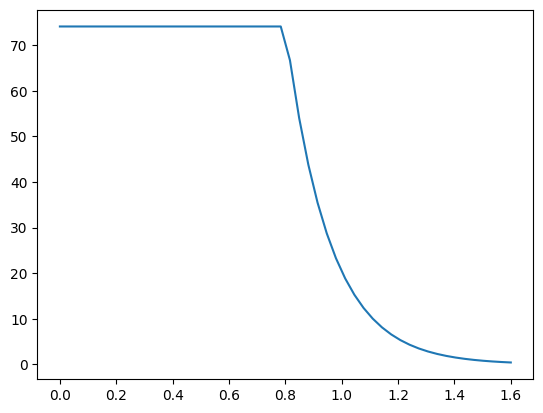

In [3]:
y = np.array(list(map(lambda x: x.value, output_current_densities)))
plt.plot(collector_voltages, y)
plt.show()

Here are the plots from H&G vol. 1 that I'm trying to match.

<img src="assets/fig_2.13a.png" alt="Hatsopolous and Gyftopoulous vol 1, page 54, Fig. 2.13a">

<img src="assets/fig_2.13b.png" alt="Hatsopolous and Gyftopoulous vol 1, page 54, Fig. 2.13b">
<img src="assets/fig_2.13c.png" alt="Hatsopolous and Gyftopoulous vol 1, page 55, Fig. 2.13c">
<img src="assets/fig_2.13d.png" alt="Hatsopolous and Gyftopoulous vol 1, page 55, Fig. 2.13d">

# Langmuir model
The following example shows results from the Langmuir model.

In [4]:
# See notes in code comments of the Ideal model above. The same applies here.
f39_emitter = tec.electrode.Metal(temperature=1500, barrier=2.2)
f39_partial_collector = functools.partial(tec.electrode.Metal, temperature=300, barrier=1.6, position=50)

collector_voltages = np.linspace(0, 2.5)

def output_current_densities(model, emitter, partial_collector, collector_voltages): 
    collectors = map(lambda voltage: partial_collector(voltage=voltage), collector_voltages)
    electrode_pairs = ((emitter, collector) for collector in collectors)
    langmuir_models = map(lambda electrodes: model(*electrodes), electrode_pairs)
    tecs = map(lambda langmuir_model: tec.TEC(langmuir_model), langmuir_models)
    output_current_densities = [tec.output_current_density().value for tec in tecs]

    return output_current_densities

f39_output_current_densities = output_current_densities(tec.models.Langmuir, f39_emitter, f39_partial_collector, collector_voltages)
f39_ideal_output_current_densities = output_current_densities(tec.models.Ideal, f39_emitter, f39_partial_collector, collector_voltages)

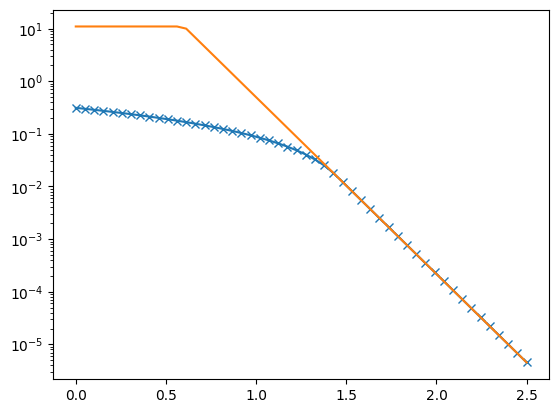

In [5]:
plt.semilogy(collector_voltages, f39_output_current_densities, "x-", collector_voltages, f39_ideal_output_current_densities)
plt.show()

<img src="assets/fig_3.9.png" alt="Hatsopolous and Gyftopoulous vol 1, page 108, Fig. 3.9" style='height: 100%; width: 30%; object-fit: scale-down'>